##### 로지스틱 회귀의 정의

로지스틱 회귀는 선형 회귀와 마찬가지로 적절한 선을 그려가는 과정이지만 직선이 아니라 참, 거짓(1, 0) 사이를 구분하는 S자 형태의 선을 긋는 작업

##### 시그모이드 함수

- y = 1 / 1 + e^-(ax + b)


##### 오차공식

시그모이드 함수의 특징은 y값이 0 ~ 1 이고, 실제값이 1일 때, 예측값이 0에 가까워지면 오차가 커짐 -> 반대 경우도 마찬가지  
로그 함수 : 이를 공식으로 만들 수 있게 해 주는 함수 

##### 로그 함수

- -{y_data log h + (1 - y_data)log(1-h)}

##### 코딩으로 확인하는 로지스틱 회귀

epochs = 0, 기울기 = -0.0500, 절편 = -0.0250
epochs = 0, 기울기 = -0.1388, 절편 = -0.0472
epochs = 0, 기울기 = -0.2268, 절편 = -0.0619
epochs = 0, 기울기 =  0.1201, 절편 = -0.0185
epochs = 0, 기울기 =  0.2374, 절편 = -0.0068
epochs = 0, 기울기 =  0.2705, 절편 = -0.0040
epochs = 0, 기울기 =  0.2860, 절편 = -0.0029
epochs = 1000, 기울기 =  1.4978, 절편 = -9.9401
epochs = 1000, 기울기 =  1.4940, 절편 = -9.9411
epochs = 1000, 기울기 =  1.4120, 절편 = -9.9547
epochs = 1000, 기울기 =  1.4949, 절편 = -9.9444
epochs = 1000, 기울기 =  1.4982, 절편 = -9.9440
epochs = 1000, 기울기 =  1.4984, 절편 = -9.9440
epochs = 1000, 기울기 =  1.4985, 절편 = -9.9440
epochs = 2000, 기울기 =  1.9065, 절편 = -12.9489
epochs = 2000, 기울기 =  1.9055, 절편 = -12.9491
epochs = 2000, 기울기 =  1.8515, 절편 = -12.9581
epochs = 2000, 기울기 =  1.9057, 절편 = -12.9514
epochs = 2000, 기울기 =  1.9068, 절편 = -12.9513
epochs = 2000, 기울기 =  1.9068, 절편 = -12.9513
epochs = 2000, 기울기 =  1.9068, 절편 = -12.9513


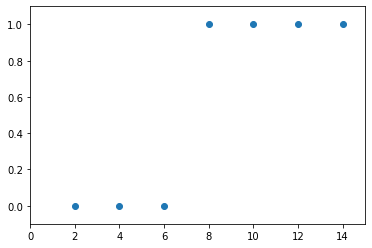

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부시간 x와 합격 여부 y의 리스트 만들기
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

# 그래프로 나타내기
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

# 기울기 a와 절편 b의 값 초기화
a = 0
b = 0

# 학습률
lr = 0.05

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

# 경사 하강법 실행
# 1,000번 반복될 때마다 각 x_data 값에 대한 현재의 a, b값 출력
for i in range(2001):
    for x_data, y_data in data:
        a_diff = x_data * (sigmoid(a * x_data + b) - y_data)
        b_diff = sigmoid(a * x_data + b) - y_data
        a = a - lr * a_diff
        b = b - lr * b_diff
        if i % 1000 == 0:
            print(f'epochs = {i}, 기울기 = {a: .4f}, 절편 = {b : .4f}')

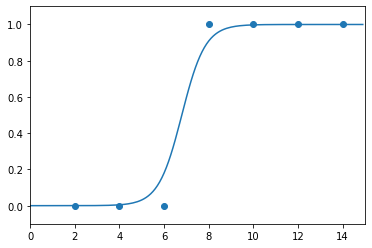

In [7]:
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

# 앞서 구한 기울기와 절편을 이용해 그래프 그리기
plt.scatter(x_data, y_data)
plt.xlim(0 , 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1))       # 그래프로 나타낼 x 값의 벙위 정하기
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a * x + b) for x in x_range]))
plt.show()

epoch = 0, 기울기 =  0.1143, 절편 =  0.0036


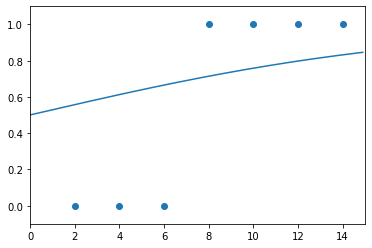

epoch = 1000, 기울기 =  0.6151, 절편 = -3.9134


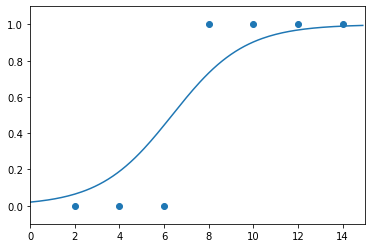

epoch = 2000, 기울기 =  0.8313, 절편 = -5.5174


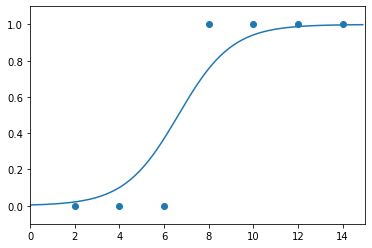

In [9]:
x_data = np.array(x_data)
y_data = np.array(y_data)

a = 0
b = 0

for i in range(2001):
    a_diff = (1 / len(x_data)) * sum(x_data * (sigmoid(a * x_data + b) - y_data))
    b_diff = (1 / len(x_data)) * sum(sigmoid(a * x_data + b) - y_data)
    a = a - lr * a_diff
    b = b - lr * b_diff
    if i % 1000 == 0:
        print(f'epoch = {i}, 기울기 = {a: .4f}, 절편 = {b: .4f}')

        plt.scatter(x_data, y_data)
        plt.xlim(0, 15)
        plt.ylim(-.1, 1.1)
        x_range = (np.arange(0, 15, 0.1))
        plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a * x + b) for x in x_range]))
        plt.show()

##### 로지스틱 회귀에서 퍼셉트론으로

- y = a₁x₁ + a₂x₂ + b

퍼셉트론 : x₁, x₂가 입력되고 각각 가중치 a₁, a₂를 만난 후 b를 더해 시그모이드 함수를 거쳐 1 or 0의 y 값을 출력